In [63]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [64]:
path_day, path_hour = None, None

for root, dirs, files in os.walk('Data'):
    for file in files:
        if file == 'day.csv':
            path_day = os.path.join(root, file)
        elif file == 'hour.csv':
            path_hour = os.path.join(root, file)

print("Day CSV path:", path_day)
print("Hour CSV path:", path_hour)
            

Day CSV path: Data\day.csv
Hour CSV path: Data\hour.csv


In [65]:
df = pd.read_csv(path_hour)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [66]:
print(df.shape)
print()
df.describe().T

(17379, 17)



,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [68]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [69]:
cat_feature = [x for x in df.columns if df[x].nunique() < 30]
numerical_features = [x for x in df.columns if x not in cat_feature]

In [70]:
cat_feature

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit']

In [71]:
season_ = {1:'springer', 2:'summer', 3:'fall', 4:'winter'}
year_ = {0: 2011, 1:2012}
mnth_ =  {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
holiday_ = {0:'yes', 1: 'No'}
weekday_ = weekday_dict = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tueday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
 
workingday_ = {0:'holiday or weekend', 1: 'workingday'}
weathersit_ = {1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
		2:"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
		3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
		4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"}

cat_dict = [season_, year_,mnth_,holiday_,weekday_, workingday_, weathersit_]


for cat, cat_ in zip(cat_feature, cat_dict): 
    print(f'categories in {cat} are :  ',end=" ")
    print(list(map(cat_.get,df[cat].unique())))
    

categories in season are :   ['springer', 'summer', 'fall', 'winter']
categories in yr are :   [2011, 2012]
categories in mnth are :   ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
categories in hr are :   ['yes', 'No', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
categories in holiday are :   ['Sunday', 'Monday']
categories in weekday are :   [None, 'holiday or weekend', 'workingday', None, None, None, None]
categories in workingday are :   [None, 'Clear, Few clouds, Partly cloudy, Partly cloudy']


In [72]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


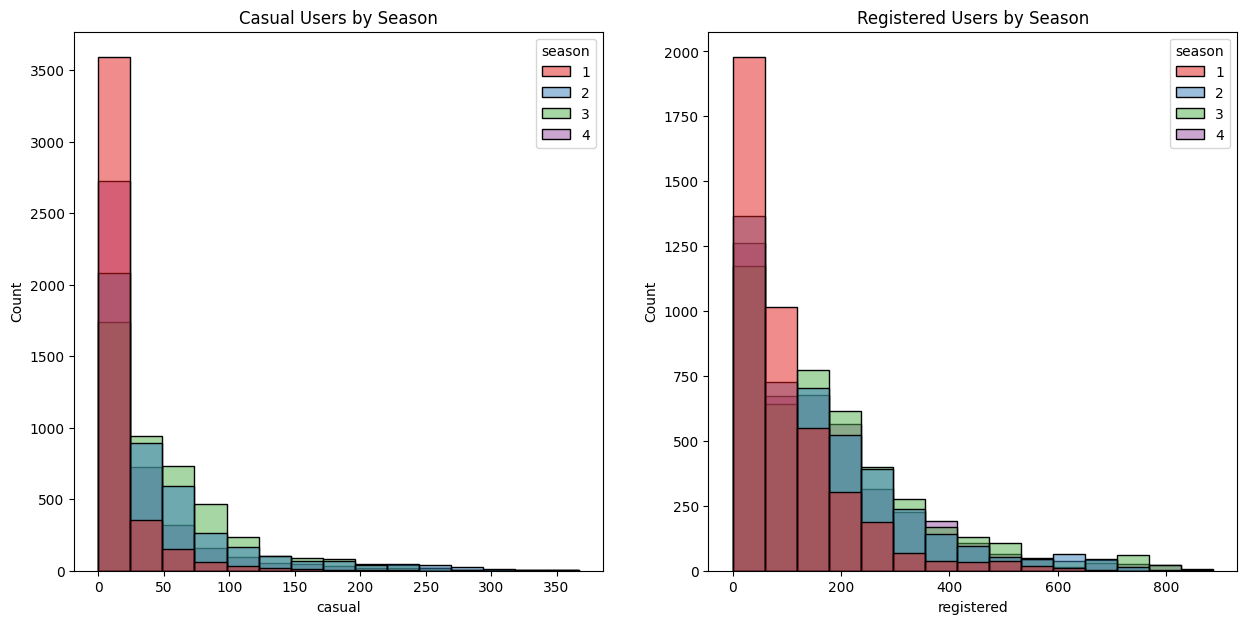

In [73]:
fig, axs = plt.subplots(1,2, figsize = (15, 7))
palette = 'Set1'
plt.subplot(121)
sns.histplot(data=df, x='casual', bins=15, hue = 'season', palette=palette)
plt.title('Casual Users by Season')
plt.subplot(122)
sns.histplot(data=df, x='registered', bins=15, hue ='season',  palette=palette)
plt.title('Registered Users by Season')
plt.show()

- Casual use is highest in summer and fall, while springer shows more frequent low counts, and winter lags behind
- Registered users display a more stable distribution across seasons, but summer and fall see the highest consistent engagement.

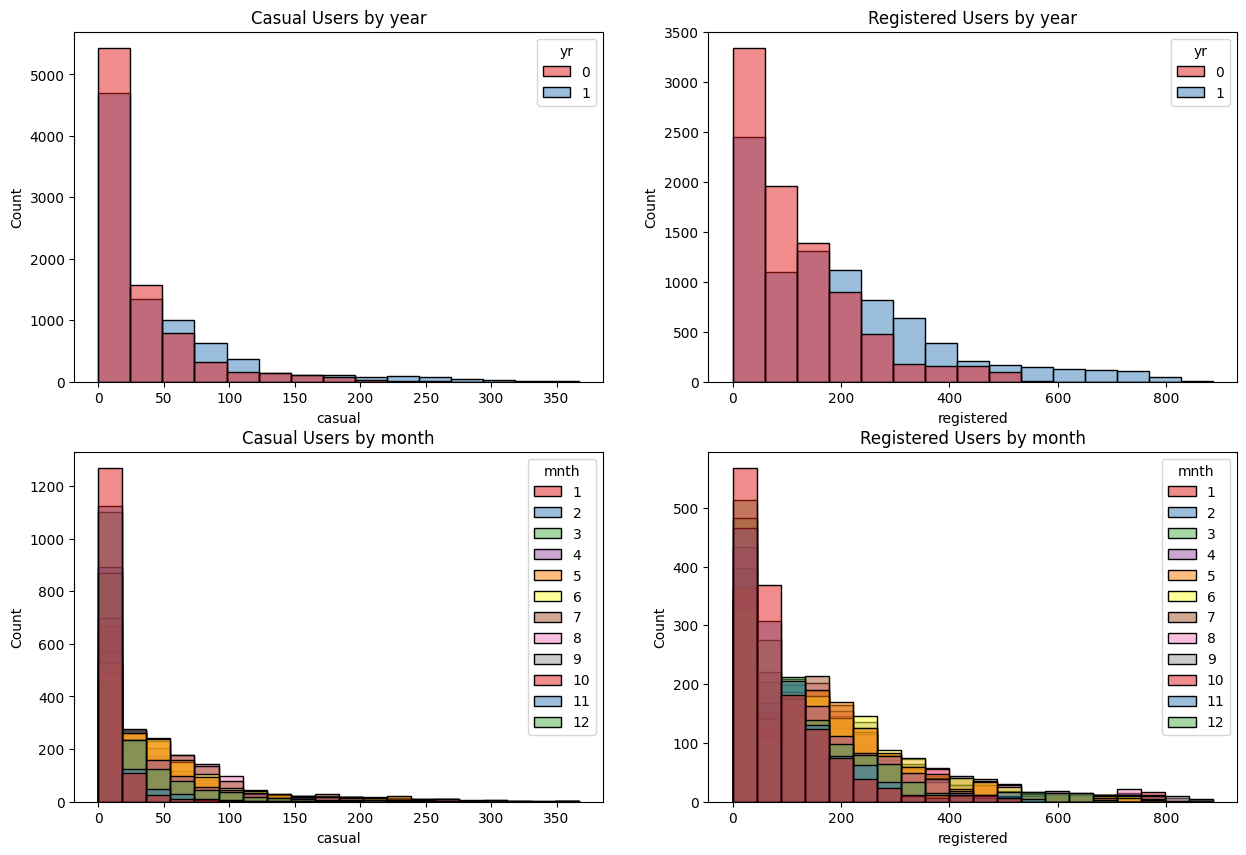

In [74]:
ig, axs = plt.subplots(2,2, figsize = (15, 10))
palette = 'Set1'
plt.subplot(221)
sns.histplot(data=df, x='casual', bins=15, hue = 'yr', palette=palette, ax=axs[0, 0])
axs[0, 0].set_title('Casual Users by year')

plt.subplot(222)
sns.histplot(data=df, x='registered', bins=15, hue ='yr',  palette=palette,ax=axs[0, 1])
axs[0,1].set_title('Registered Users by year')

plt.subplot(223)
sns.histplot(data=df, x='casual', bins=20, hue = 'mnth', palette=palette, ax=axs[1, 0])
axs[1,0].set_title('Casual Users by month')

plt.subplot(224)
sns.histplot(data=df, x='registered', bins=20, hue ='mnth',  palette=palette,ax=axs[1, 1])
axs[1,1].set_title('Registered Users by month')
plt.show()

- Registered usage is clearly higher in 2012 compared to 2011.
- Casual usage in 2012 shows a broader distribution, with more days of moderate to high usage, but the highest number of low-usage days still occurred in 2011.

Text(0.5, 1.0, 'registered Users on weekday')

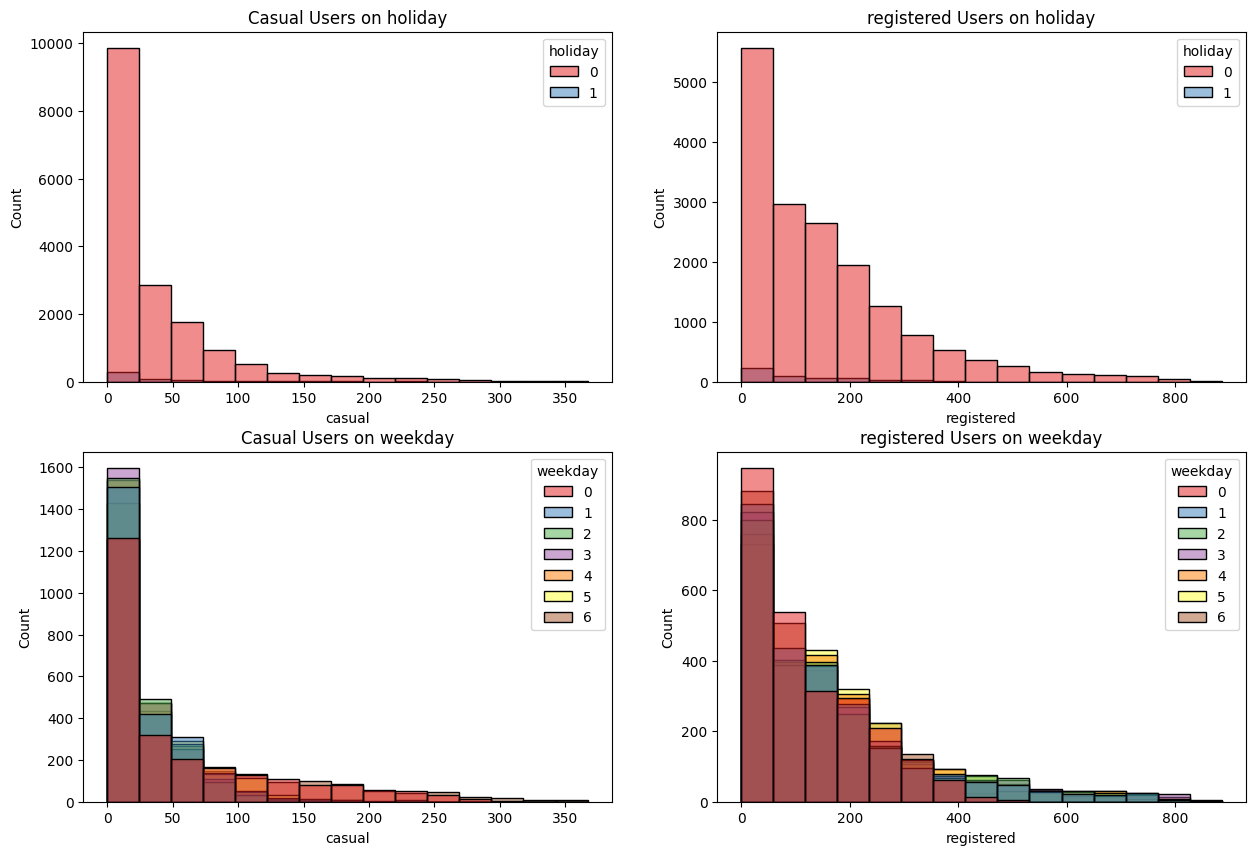

In [75]:
fig, axs = plt.subplots(2,2, figsize=(15,10))

palette = 'Set1'
plt.subplot(221)
sns.histplot(data=df, x='casual', bins = 15, hue='holiday', palette=palette, ax=axs[0,0])
axs[0,0].set_title('Casual Users on holiday')

plt.subplot(222)
sns.histplot(data=df, x='registered', bins = 15, hue='holiday', palette=palette, ax=axs[0,1])
axs[0,1].set_title('registered Users on holiday')

palette = 'Set1'
plt.subplot(223)
sns.histplot(data=df, x='casual', bins = 15, hue='weekday', palette=palette, ax=axs[1,0])
axs[1,0].set_title('Casual Users on weekday')

plt.subplot(224)
sns.histplot(data=df, x='registered', bins = 15, hue='weekday', palette=palette, ax=axs[1,1])
axs[1,1].set_title('registered Users on weekday')

Text(0.5, 1.0, 'registered Users on weathersit')

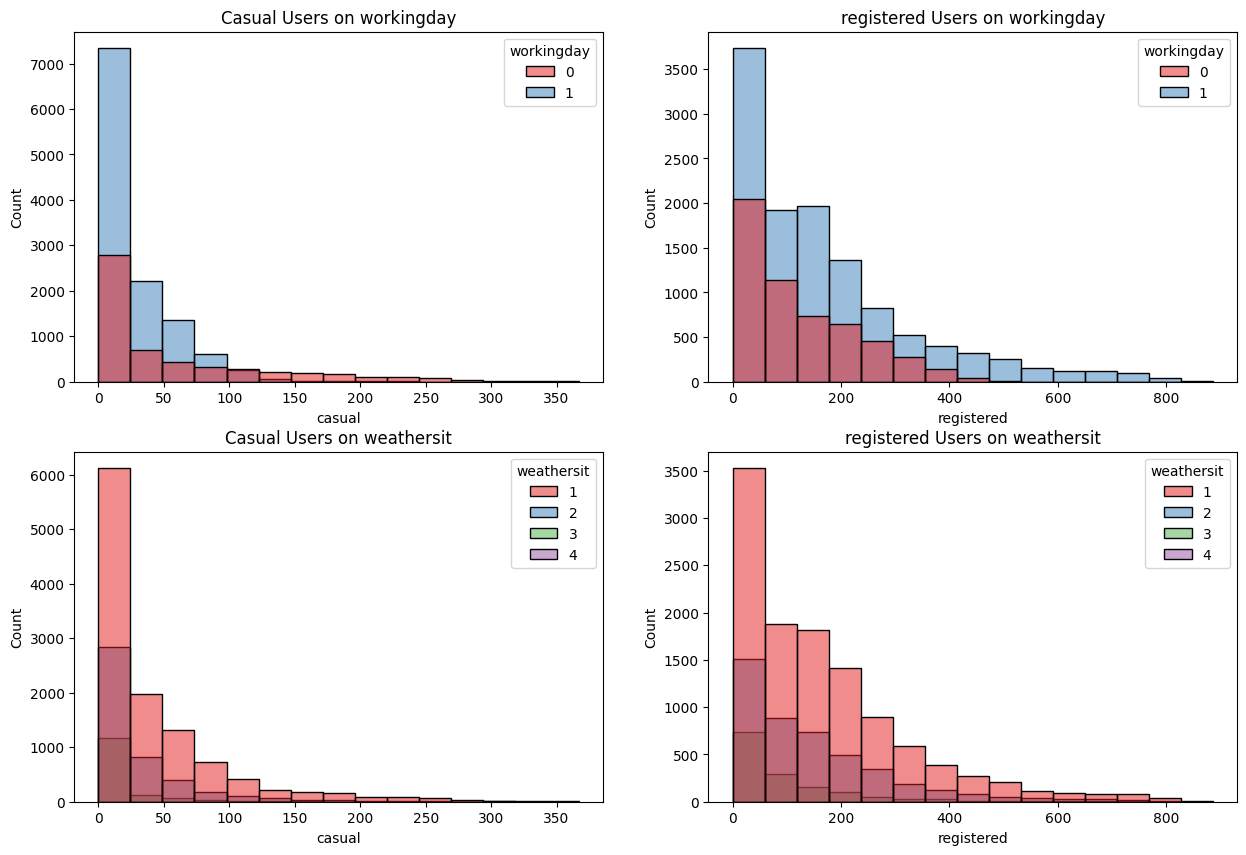

In [76]:
fig, axs = plt.subplots(2,2, figsize=(15,10))

palette = 'Set1'
plt.subplot(221)
sns.histplot(data=df, x='casual', bins = 15, hue='workingday', palette=palette, ax=axs[0,0])
axs[0,0].set_title('Casual Users on workingday')

plt.subplot(222)
sns.histplot(data=df, x='registered', bins = 15, hue='workingday', palette=palette, ax=axs[0,1])
axs[0,1].set_title('registered Users on workingday')

palette = 'Set1'
plt.subplot(223)
sns.histplot(data=df, x='casual', bins = 15, hue='weathersit', palette=palette, ax=axs[1,0])
axs[1,0].set_title('Casual Users on weathersit')

plt.subplot(224)
sns.histplot(data=df, x='registered', bins = 15, hue='weathersit', palette=palette, ax=axs[1,1])
axs[1,1].set_title('registered Users on weathersit')

In [77]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


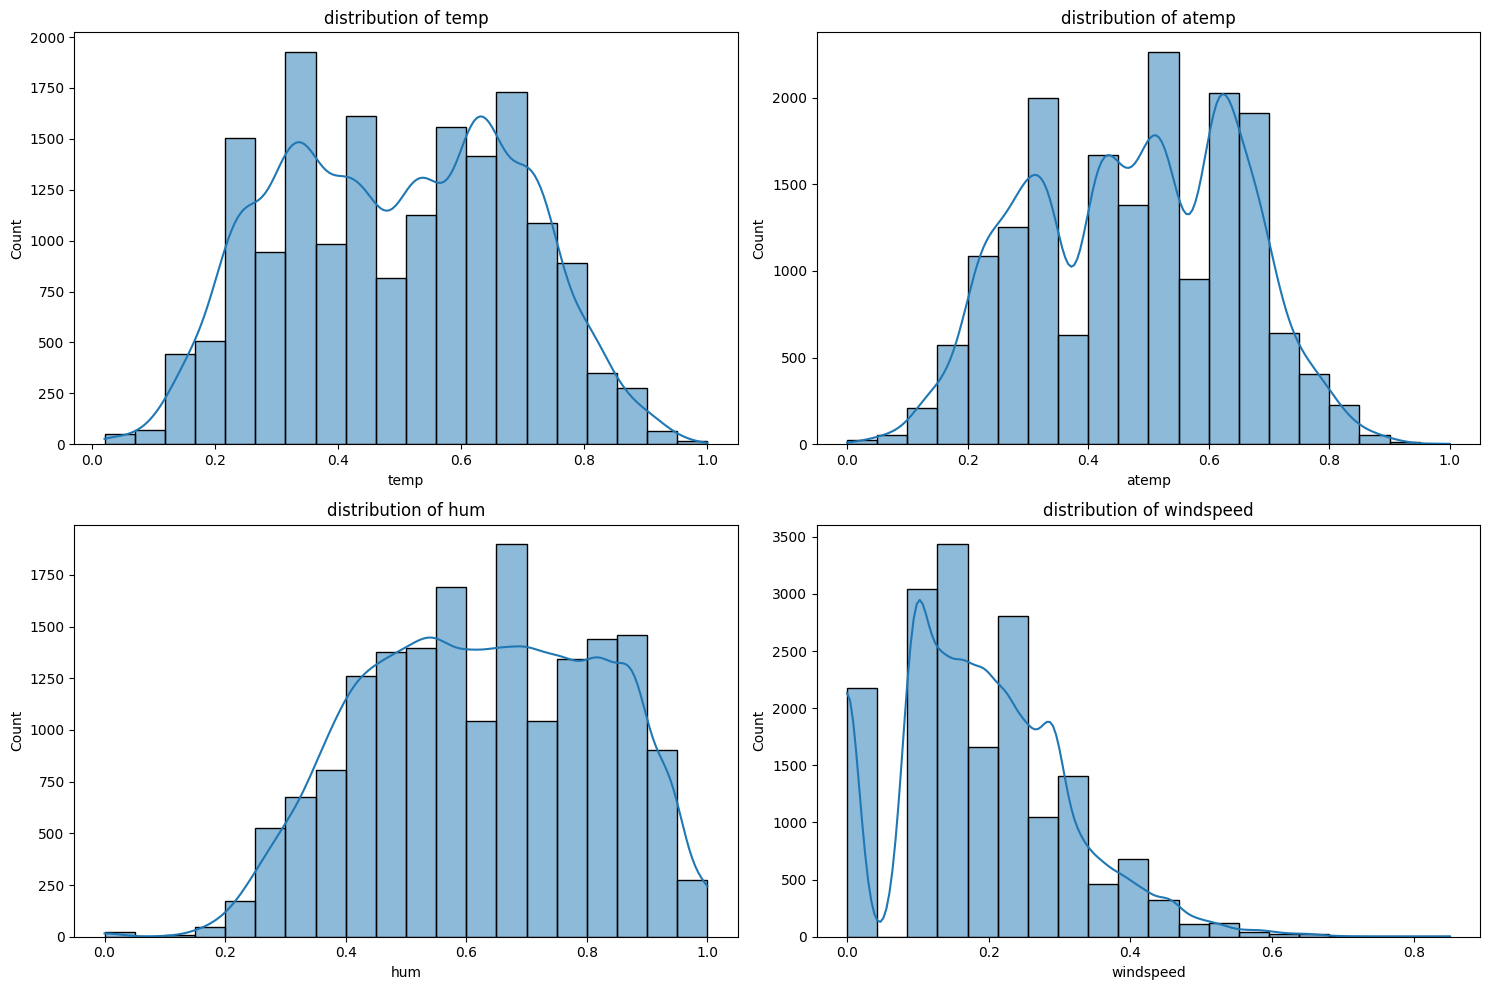

In [78]:
fig ,axs = plt.subplots(2,2, figsize=(15,10))
axs = axs.flatten()

for i,col in enumerate(numerical_features[2:-3]):
    sns.histplot(data=df, x=col, ax=axs[i], kde=True, bins=20, edgecolor='black')
    axs[i].set_title(f'distribution of {col}')
plt.tight_layout()
plt.show()

- Temp: Nearly uniform distribution with a slight left skew; values mostly between 0.4–0.7.

- Atemp: Similar to temp, slightly multi-modal with peaks around mid-range values.

- Hum: Fairly uniform with a mild right skew; most values between 0.4–0.8.

- Windspeed: Strong right skew with most values concentrated near 0.1–0.2.

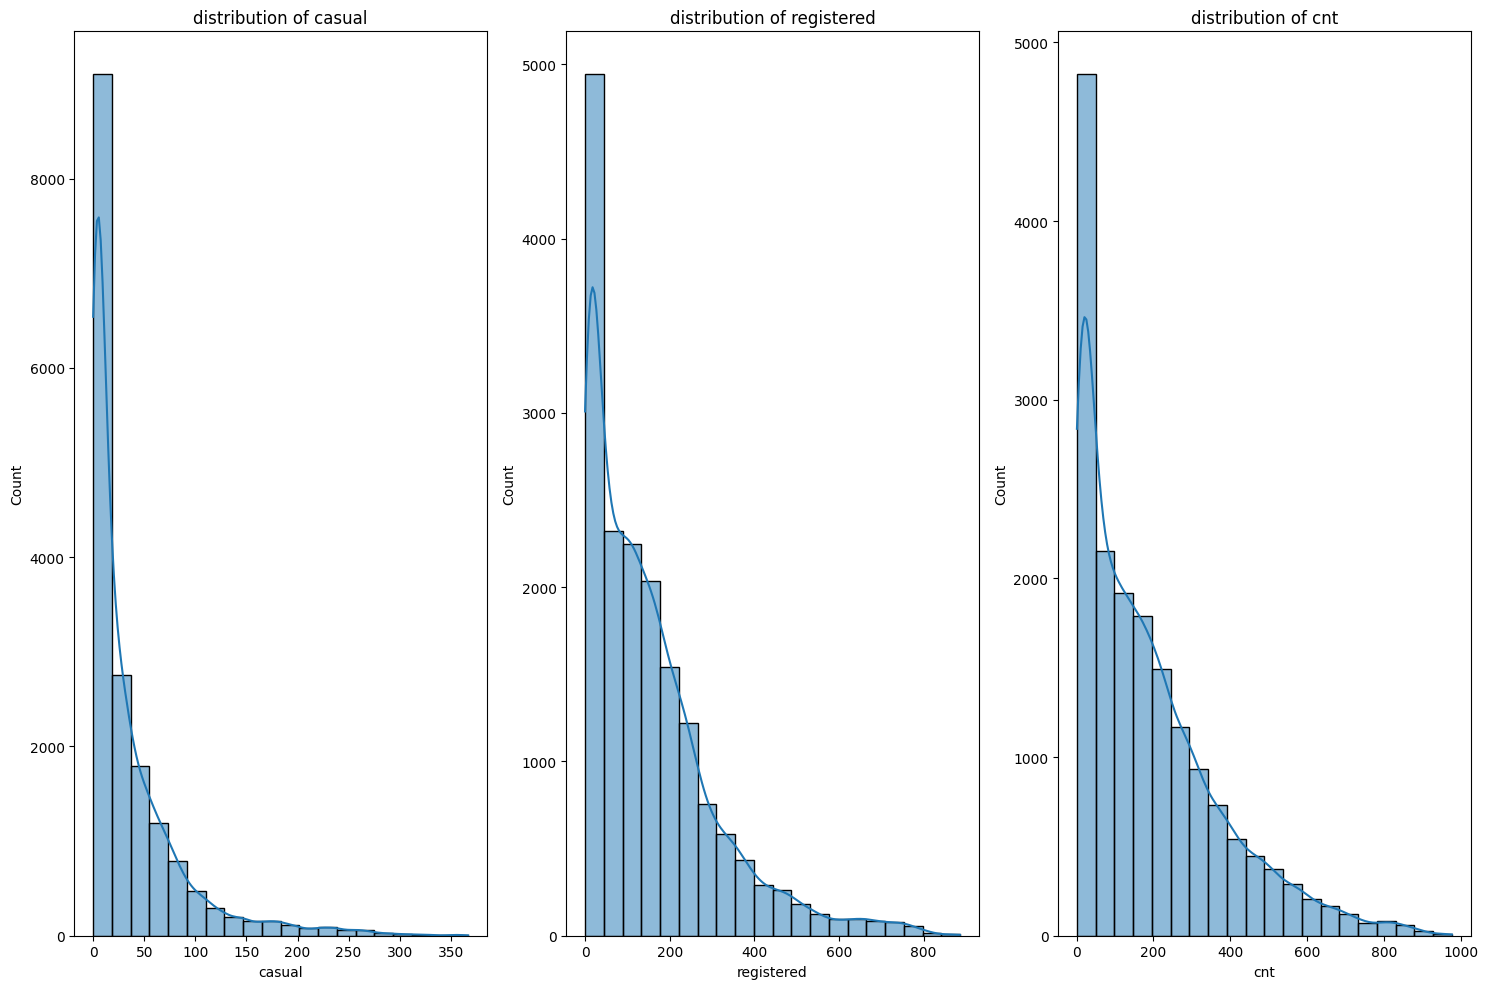

In [79]:
fig ,axs = plt.subplots(1,3, figsize=(15,10))
axs = axs.flatten()

for i,col in enumerate(numerical_features[-3:]):
    sns.histplot(data=df, x=col, ax=axs[i], kde=True, bins=20, edgecolor='black')
    axs[i].set_title(f'distribution of {col}')
plt.tight_layout()
plt.show()

Casual: Heavily right-skewed; most casual user counts are low, with very few high outliers.

Registered: Right-skewed distribution; majority of values lie on the lower end, but with a longer tail than casual.

Cnt (Total Users): Also right-skewed; total user counts are dominated by lower values, combining both casual and registered trends.

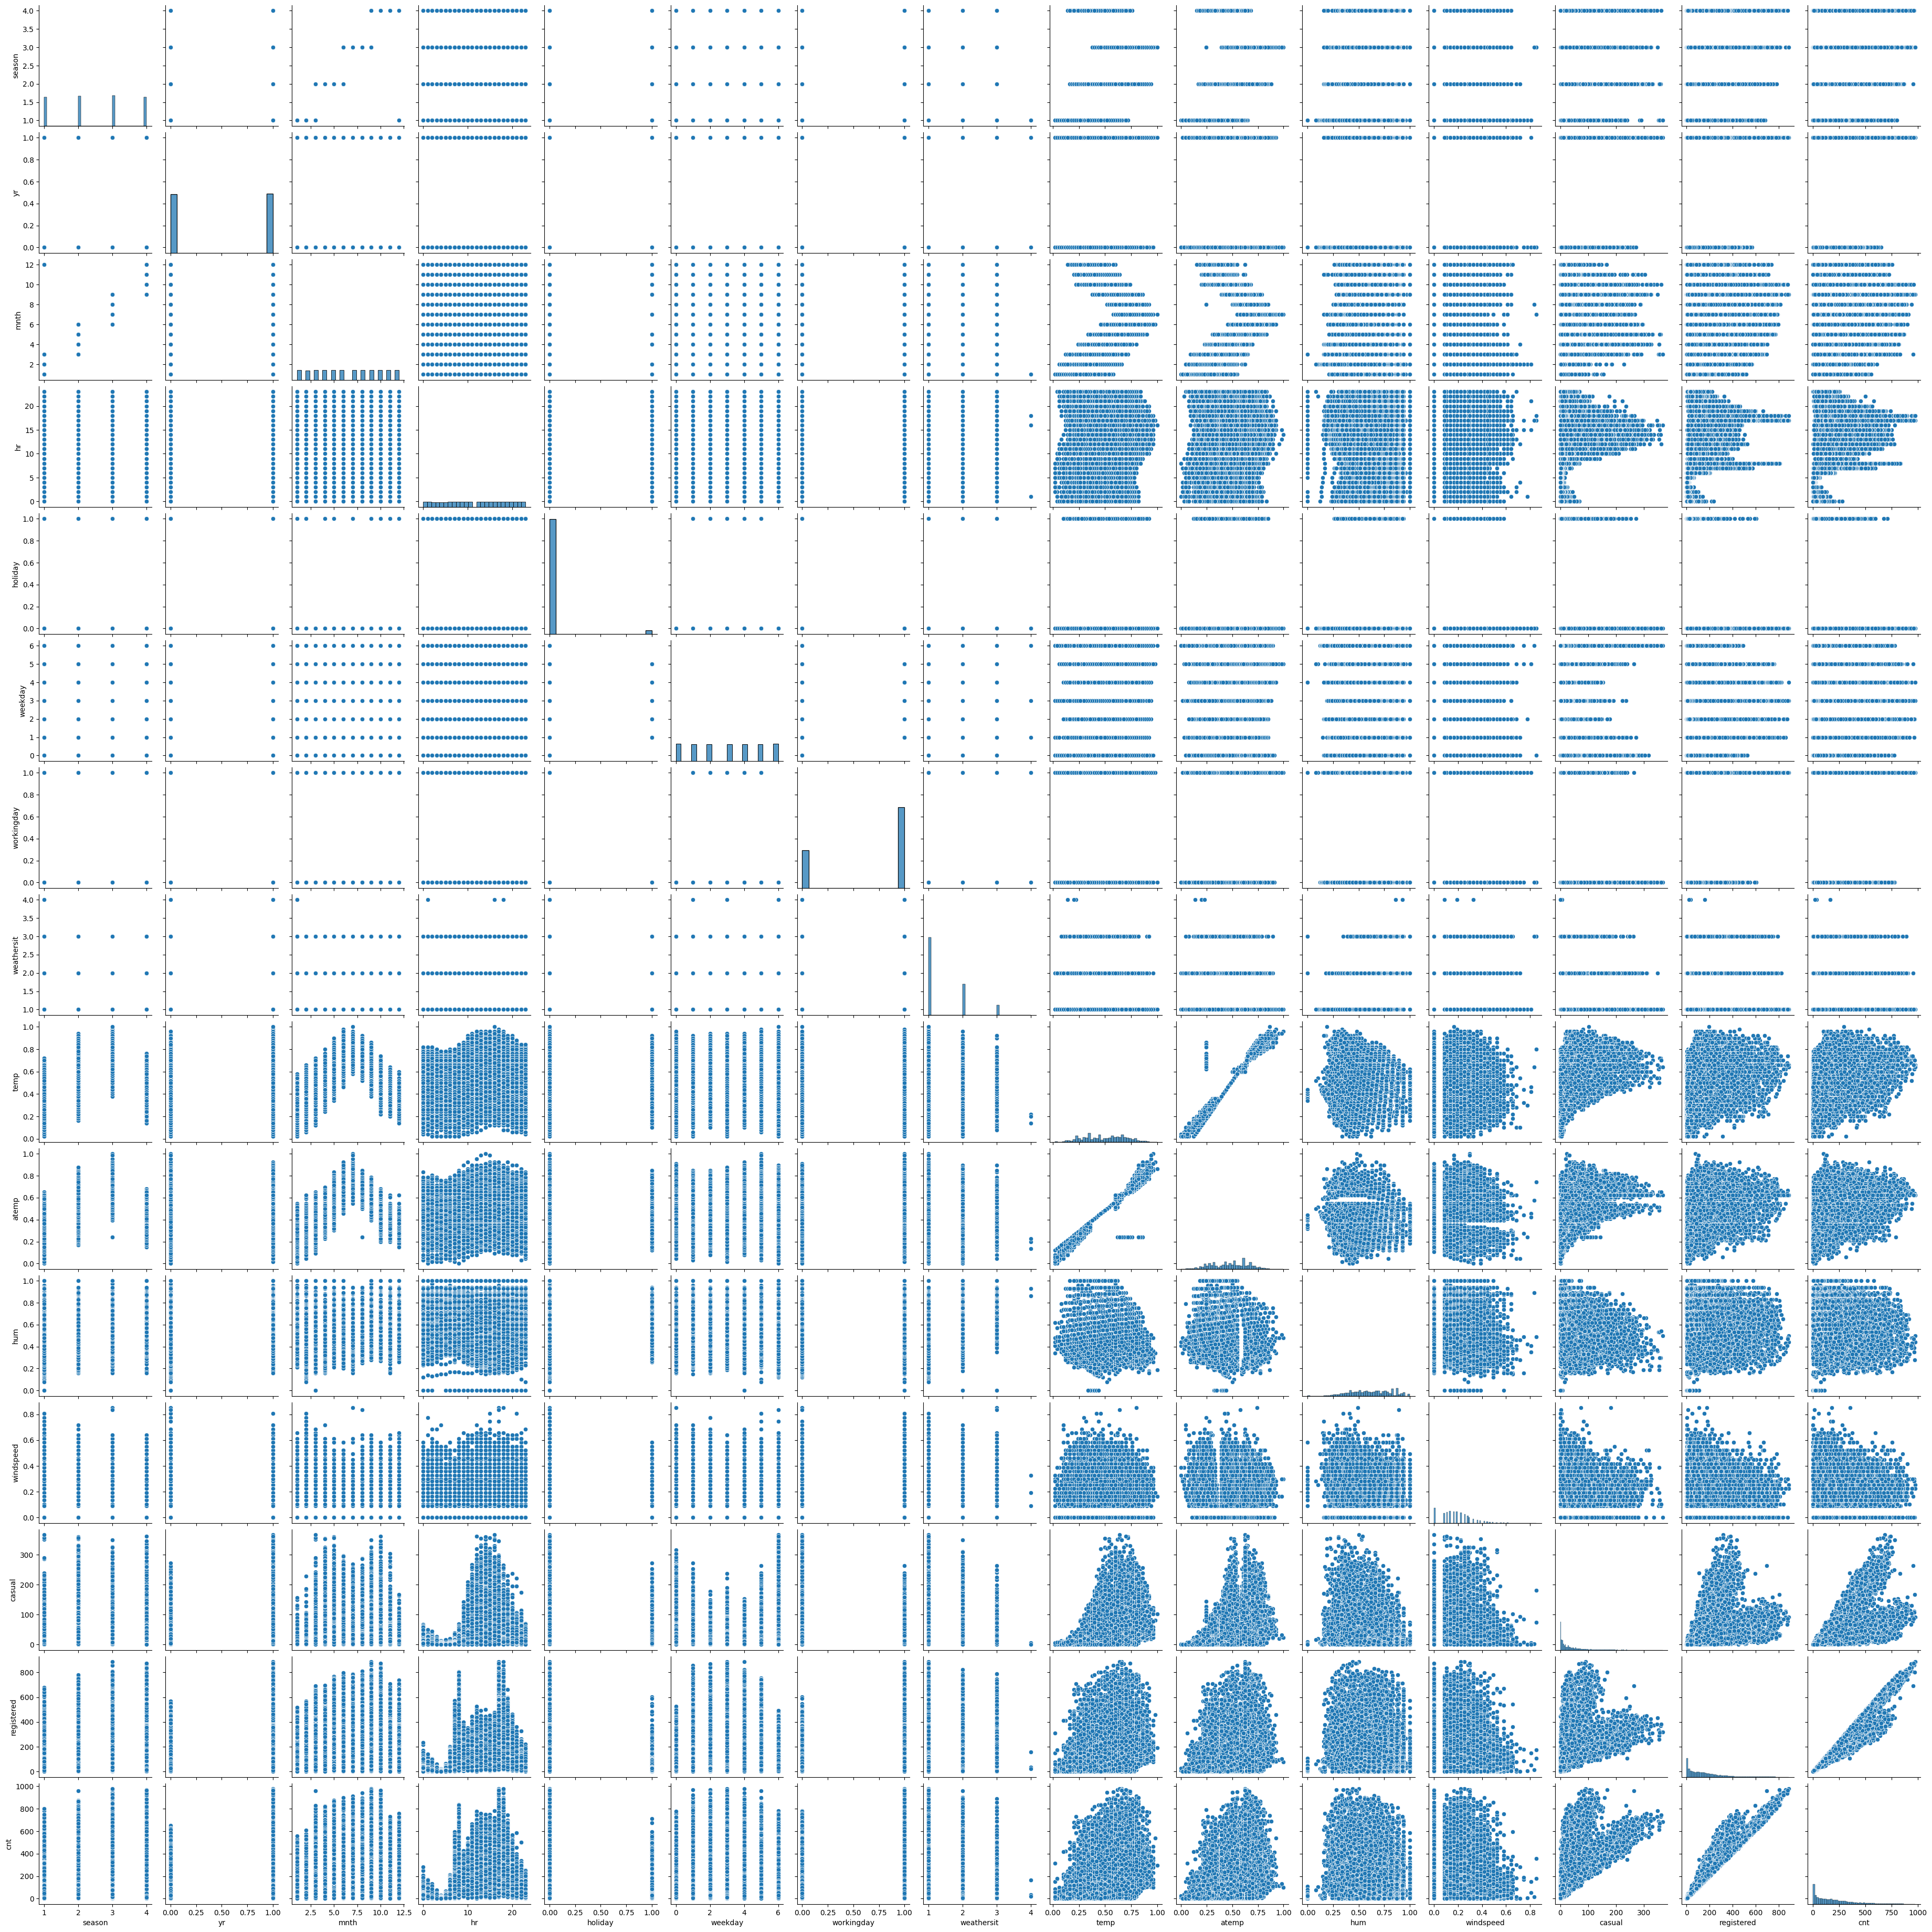

In [80]:
dt = df.iloc[:,2:]
sns.pairplot(data=dt)

In [81]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [82]:
print(cat_feature)
print(numerical_features)

print()

print(cat_dict)

['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
['instant', 'dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

[{1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}, {0: 2011, 1: 2012}, {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}, {0: 'yes', 1: 'No'}, {0: 'Sunday', 1: 'Monday', 2: 'Tueday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, {0: 'holiday or weekend', 1: 'workingday'}, {1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}]


In [83]:
new_cat_feature = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [84]:
new_df = df.copy()

In [85]:
for cat, cat_ in zip(new_cat_feature,cat_dict):
    new_df[cat]=new_df[cat].replace(cat_)

In [86]:
new_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,0,yes,Saturday,holiday or weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,January,1,yes,Saturday,holiday or weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,January,2,yes,Saturday,holiday or weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,January,3,yes,Saturday,holiday or weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,January,4,yes,Saturday,holiday or weekend,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


In [87]:
new_df.to_csv('data/hour_new.csv')